In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [ ]:
raw_data = pd.read_csv('/content/datasets/Samsung.csv')
print(raw_data.head())

         Date    Open    High     Low   Close    Adj Close      Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4740.119629  74195000.0
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4328.947754  74680000.0
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4359.979492  54390000.0
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4297.916992  40305000.0
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4476.349121  46880000.0


In [ ]:
print(raw_data.tail())

            Date     Open     High      Low    Close  Adj Close      Volume
5385  2021-06-07  82700.0  82800.0  81600.0  81900.0    81900.0  16496197.0
5386  2021-06-08  82300.0  82600.0  81800.0  81900.0    81900.0  12781226.0
5387  2021-06-09  81500.0  82000.0  81100.0  81100.0    81100.0  14908823.0
5388  2021-06-10  81300.0  81400.0  80900.0  81000.0    81000.0  17586995.0
5389  2021-06-11  81200.0  81700.0  80700.0  81000.0    81000.0  14087962.0


In [ ]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5390 non-null   object 
 1   Open       5384 non-null   float64
 2   High       5384 non-null   float64
 3   Low        5384 non-null   float64
 4   Close      5384 non-null   float64
 5   Adj Close  5384 non-null   float64
 6   Volume     5384 non-null   float64
dtypes: float64(6), object(1)
memory usage: 294.9+ KB
None


In [ ]:
data_close = raw_data[['Close']]
print(data_close.head())

    Close
0  6110.0
1  5580.0
2  5620.0
3  5540.0
4  5770.0


In [ ]:
data_close = data_close.sort_values('Close') # close값을 기준으로 내림차순
print(data_close.head())
print(data_close.tail(20))

      Close
206  2730.0
205  2740.0
214  2750.0
452  2810.0
453  2810.0
        Close
5297  85600.0
5343  86000.0
5296  86700.0
5294  86800.0
5291  87000.0
5292  87200.0
5289  88000.0
5293  88100.0
5284  88800.0
5295  89400.0
5288  89700.0
5287  89700.0
5286  90600.0
5285  91000.0
1304      NaN
4513      NaN
4518      NaN
4542      NaN
4755      NaN
5000      NaN


In [ ]:
#Date 행을 datetime 타입으로 변경 및 인덱스로 사용
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)
print(raw_data.head())

              Open    High     Low   Close    Adj Close      Volume
Date                                                               
2000-01-04  6000.0  6110.0  5660.0  6110.0  4740.119629  74195000.0
2000-01-05  5800.0  6060.0  5520.0  5580.0  4328.947754  74680000.0
2000-01-06  5750.0  5780.0  5580.0  5620.0  4359.979492  54390000.0
2000-01-07  5560.0  5670.0  5360.0  5540.0  4297.916992  40305000.0
2000-01-10  5600.0  5770.0  5580.0  5770.0  4476.349121  46880000.0


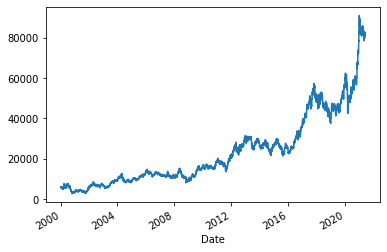

In [ ]:
raw_data['Close'].plot()
plt.show()

In [ ]:
data = raw_data['2019-06-15':'2020-06-14'][['Close']]
print(data.head())
print(data.tail())
print(data.info())

              Close
Date               
2019-06-17  43900.0
2019-06-18  44350.0
2019-06-19  45350.0
2019-06-20  45500.0
2019-06-21  45700.0
              Close
Date               
2020-06-08  54900.0
2020-06-09  55500.0
2020-06-10  55400.0
2020-06-11  54300.0
2020-06-12  52300.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2019-06-17 to 2020-06-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   245 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None


In [ ]:
data.dropna(inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2019-06-17 to 2020-06-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   245 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None


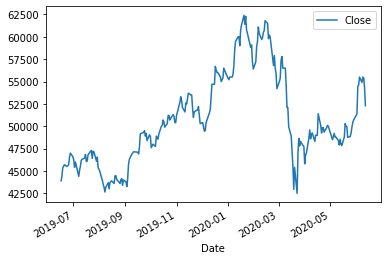

In [ ]:
data.plot()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(data)
print(scaled_data[:6])
print(scaled_data.shape)

[[0.07035176]
 [0.09296482]
 [0.14321608]
 [0.15075377]
 [0.16080402]
 [0.15075377]]
(245, 1)


In [ ]:
# 각 길이가 28인 시퀀스로 만듦
sequence_X = []
sequence_Y = []
for i in range(len(scaled_data) - 28):
    _x = scaled_data[i:i+28] # i ~ i+27번째 feature은
    _y = scaled_data[i+28]  # i+28번째가 label
    if i is 0 :
        print(_x, '->', _y)
    sequence_X.append(_x)
    sequence_Y.append(_y)

[[0.07035176]
 [0.09296482]
 [0.14321608]
 [0.15075377]
 [0.16080402]
 [0.15075377]
 [0.15577889]
 [0.16080402]
 [0.20100503]
 [0.22613065]
 [0.20603015]
 [0.18844221]
 [0.14572864]
 [0.1758794 ]
 [0.15829146]
 [0.09547739]
 [0.13065327]
 [0.15326633]
 [0.18592965]
 [0.19095477]
 [0.19849246]
 [0.21859296]
 [0.17839196]
 [0.18090452]
 [0.2160804 ]
 [0.2361809 ]
 [0.24120603]
 [0.1959799 ]] -> [0.2361809]


In [ ]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[1])
print(sequence_X[1])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.09296482]
 [0.14321608]
 [0.15075377]
 [0.16080402]
 [0.15075377]
 [0.15577889]
 [0.16080402]
 [0.20100503]
 [0.22613065]
 [0.20603015]
 [0.18844221]
 [0.14572864]
 [0.1758794 ]
 [0.15829146]
 [0.09547739]
 [0.13065327]
 [0.15326633]
 [0.18592965]
 [0.19095477]
 [0.19849246]
 [0.21859296]
 [0.17839196]
 [0.18090452]
 [0.2160804 ]
 [0.2361809 ]
 [0.24120603]
 [0.1959799 ]
 [0.2361809 ]]
[[0.09296482]
 [0.14321608]
 [0.15075377]
 [0.16080402]
 [0.15075377]
 [0.15577889]
 [0.16080402]
 [0.20100503]
 [0.22613065]
 [0.20603015]
 [0.18844221]
 [0.14572864]
 [0.1758794 ]
 [0.15829146]
 [0.09547739]
 [0.13065327]
 [0.15326633]
 [0.18592965]
 [0.19095477]
 [0.19849246]
 [0.21859296]
 [0.17839196]
 [0.18090452]
 [0.2160804 ]
 [0.2361809 ]
 [0.24120603]
 [0.1959799 ]
 [0.2361809 ]]
(217, 28, 1)
(217, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    sequence_X, sequence_Y, test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(173, 28, 1)
(173, 1)
(44, 28, 1)
(44, 1)


In [ ]:
model = Sequential()
model.add(LSTM(50,
    input_shape=(X_train.shape[1], X_train.shape[2]),
    #return_sequences=True,   #28개 모두 나온다(모두 사용하겠다), Flatten 사용
    activation='tanh'))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_hist = model.fit(X_train, Y_train, epochs=500,
    validation_data=(X_test, Y_test), shuffle=False)

Epoch 1/500
6/6 [==============================] - 3s 108ms/step - loss: 0.2403 - val_loss: 0.1399
Epoch 2/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0716 - val_loss: 0.0178
Epoch 3/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0295 - val_loss: 0.0335
Epoch 4/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0240 - val_loss: 0.0148
Epoch 5/500
6/6 [==============================] - 0s 20ms/step - loss: 0.0176 - val_loss: 0.0174
Epoch 6/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0191 - val_loss: 0.0154
Epoch 7/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0165 - val_loss: 0.0128
Epoch 8/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0148 - val_loss: 0.0133
Epoch 9/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0145 - val_loss: 0.0125
Epoch 10/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0136 - val_loss: 0.0116
Epoch 11/500
6/6 [

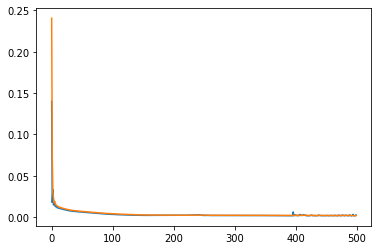

In [ ]:
plt.plot(fit_hist.history['val_loss'])
plt.plot(fit_hist.history['loss'])
plt.show()

In [ ]:
predict = model.predict(X_test)

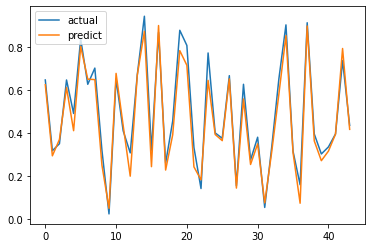

In [ ]:
plt.plot(Y_test, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()